In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))
    

Populating the interactive namespace from numpy and matplotlib


Думаю для решения данной задачи можно попробовать применить как классическую линейную регрессию, так использование обычных временных рядов, попробую спрогнозировать для 2018

In [2]:
df = pd.read_excel('BST_DataSet.xlsx',   dayfirst=True)
df = df.rename(columns={"Unnamed: 0": "date"})
df.set_index('date', inplace = True)
df

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
date,,,,,,,,,,,
2011-01-01,-79049.0,5.244667,7.75,2.90,4.50,96.29,106.171510,5.532900e+06,19307.700000,30.08,20669
2011-02-01,180475.0,5.144211,8.00,3.10,4.40,103.96,106.999640,5.613700e+06,19536.700000,29.29,20680
2011-03-01,106845.0,5.021364,8.00,3.10,4.20,114.44,107.663040,5.647000e+06,19788.700000,28.43,22673
2011-04-01,224890.0,4.558571,8.00,2.60,4.10,123.15,108.125990,5.863400e+06,20020.800000,28.10,22519
2011-05-01,45856.0,4.795000,8.25,2.60,4.10,114.46,108.645000,5.893400e+06,20160.900000,27.87,22779
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-01,NaN,7.882174,9.00,0.73,6.07,52.00,168.418880,9.194600e+06,39419.300000,59.65,37099
2017-09-01,NaN,7.648095,8.50,0.66,5.31,57.00,168.166250,9.225200e+06,39571.000000,57.73,38047
2017-10-01,NaN,7.503636,8.25,0.61,5.67,57.50,168.502590,9.246600e+06,39565.982237,57.71,38333


C:\Users\Ivan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Прирост вкладов физических лиц в рублях (млн руб)')

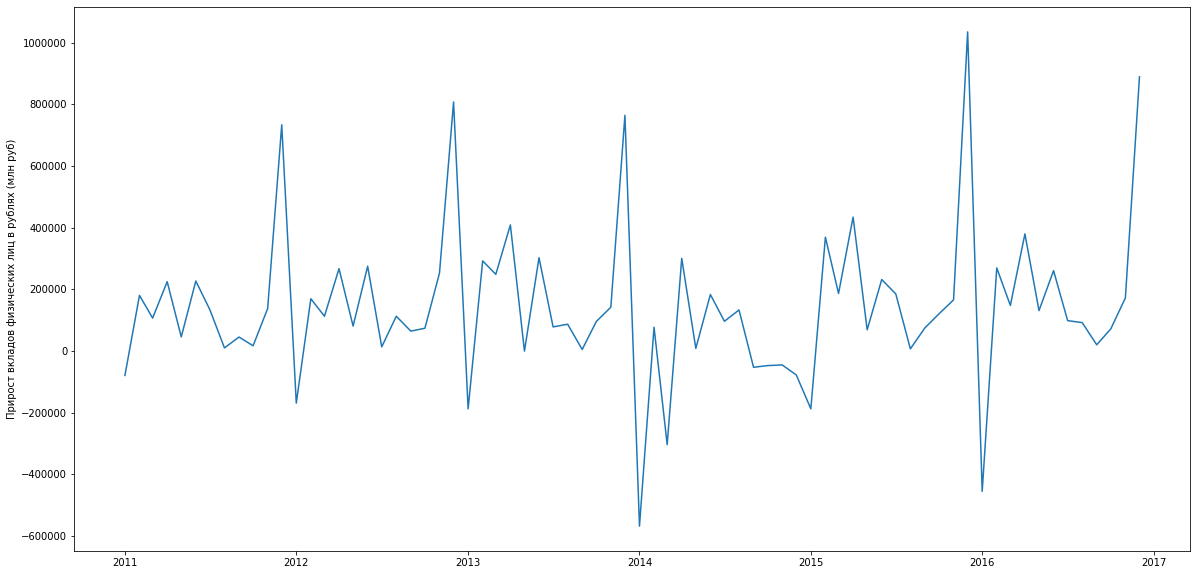

In [3]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df[df.columns[0:1]])
plt.ylabel('Прирост вкладов физических лиц в рублях (млн руб)')

Посмотрим на распределение величин

C:\Users\Ivan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ivan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


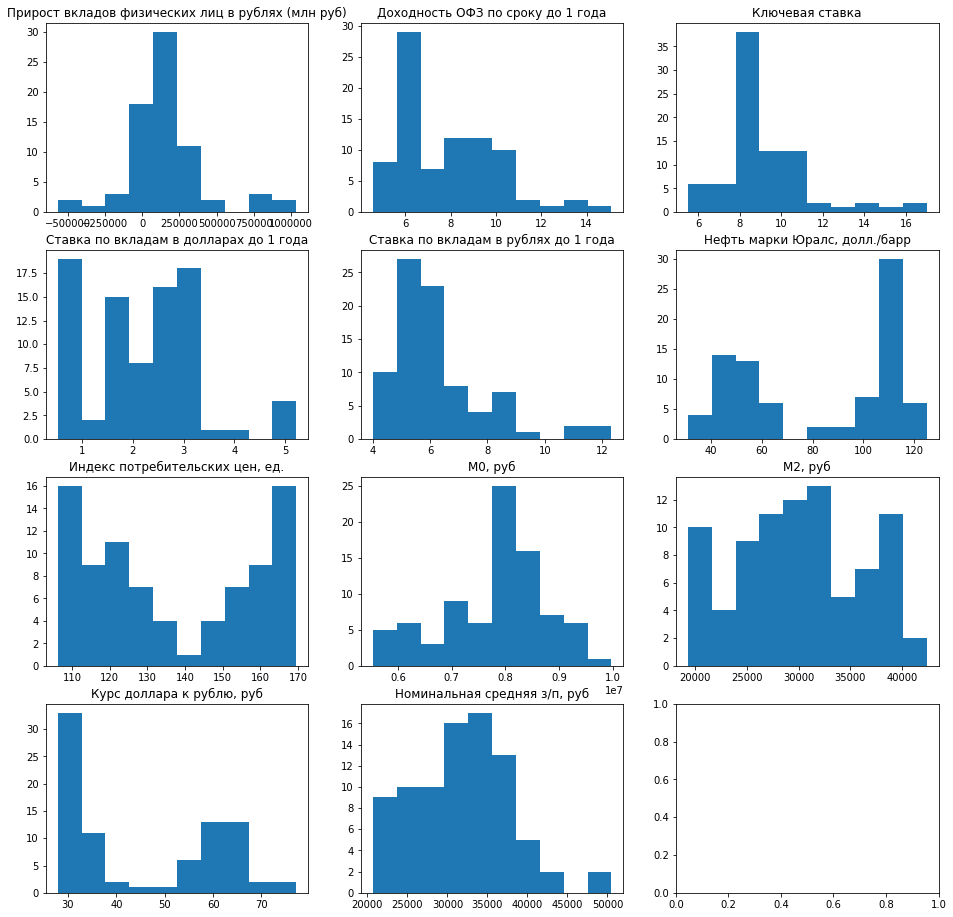

In [15]:

fig, axs = plt.subplots(4,3,figsize=(16,16))

for index, parametr in enumerate(df.columns):
    x = int(index/3)
    y = int(index %3)
    
    axs[x,y].hist(df[parametr].astype('float'))
    axs[x,y].set_title(parametr)

По нашим данным нет особенных выбросов, но и данных у нас не так много чтобы ими принебрегать. Применим линейную регрессию, можно было провести нормализацию для большей предсказательной способности.

In [16]:
train_x = df[df.columns[1:]][:60]
test_x = df[df.columns[1:]][60:72]

train_y = df[df.columns[0:1]][:60]
test_y = df[df.columns[0:1]][60:72]

x_predict = df[df.columns[1:]][72:]

In [17]:
model = LinearRegression()
model.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Прирост вкладов физических лиц в рублях (млн руб)')

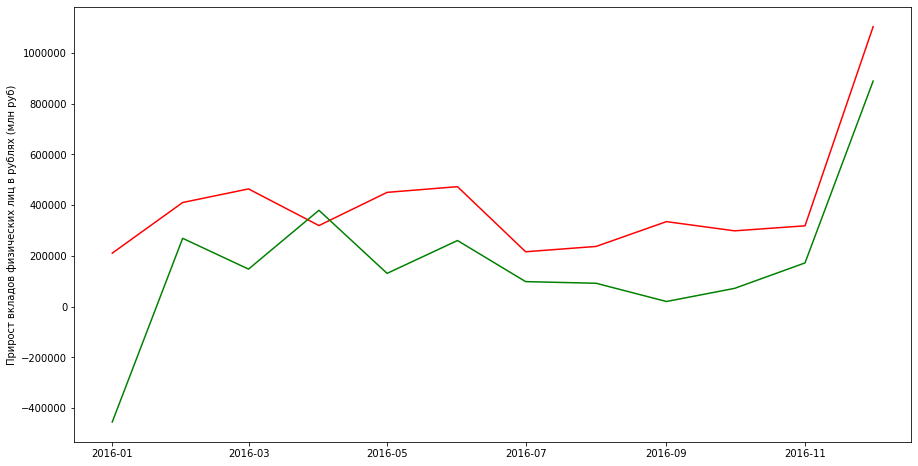

In [18]:
plt.figure(figsize=(15,8)) 
plt.plot(df.index[60:72], model.predict(test_x), color = 'red')
plt.plot(df.index[60:72], test_y, color = 'green')
plt.ylabel('Прирост вкладов физических лиц в рублях (млн руб)')

Text(0, 0.5, 'Прирост вкладов физических лиц в рублях (млн руб)')

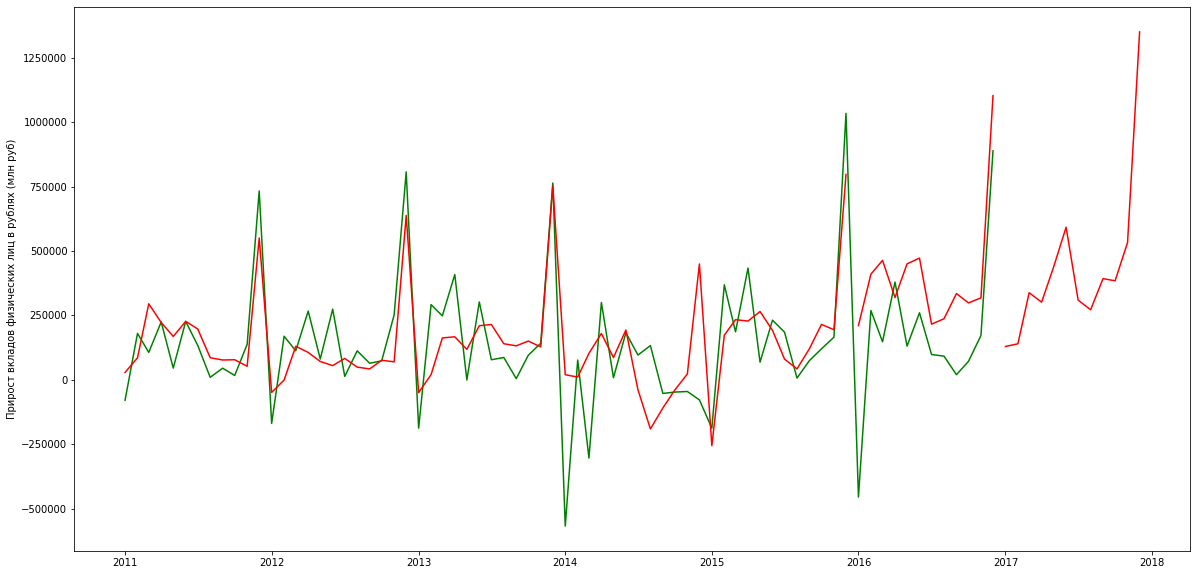

In [19]:
plt.figure(figsize=(20,10)) 
plt.plot(df.index[:72],df[df.columns[0:1]][:72] , color = 'green')
plt.plot(df.index[72:], model.predict(x_predict), color= 'red')
plt.plot(df.index[:60], model.predict(train_x), color= 'red')
plt.plot(df.index[60:72], model.predict(test_x), color= 'red')
plt.ylabel('Прирост вкладов физических лиц в рублях (млн руб)')


результаты полученные линейной регрессией не выглядят хорошо поэтому ниже будем использовать временные ряды, возможно нужно было сделать нормализаци

In [44]:
model.predict(x_predict) 

array([[ 129692.97675475],
       [ 140140.40775717],
       [ 338410.16202339],
       [ 301693.87774225],
       [ 438653.5789488 ],
       [ 592626.09993389],
       [ 309739.88988669],
       [ 272121.16699034],
       [ 393084.04399446],
       [ 384663.56139658],
       [ 533112.87493819],
       [1350742.80482988]])

Попробуем использовать временные ряды так как классическая линейная регрессия дает не очень хорошие результаты


In [45]:
df2 = df[df.columns[0:1]]
df2.columns = [ 'growth']
df2 = df2[:72]
df2

,growth
date,
2011-01-01,-79049.0
2011-02-01,180475.0
2011-03-01,106845.0
2011-04-01,224890.0
2011-05-01,45856.0
...,...
2016-08-01,92168.0
2016-09-01,20272.0
2016-10-01,72037.0


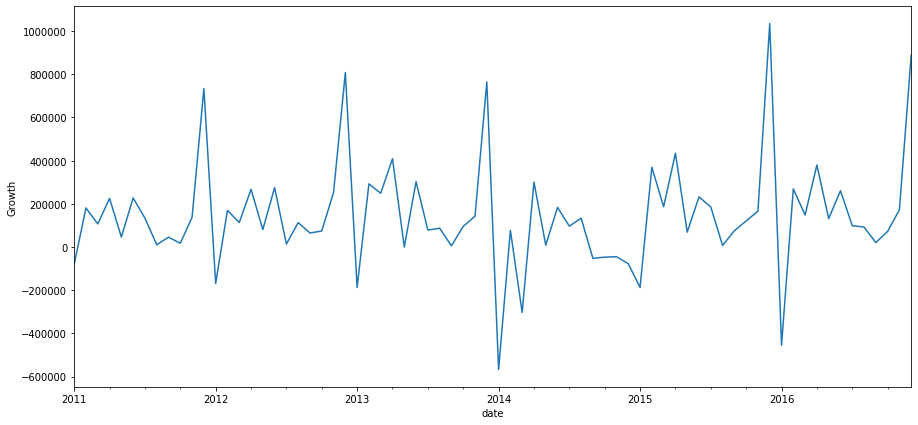

In [46]:
plt.figure(figsize(15,7))
df2.growth.plot()
plt.ylabel('Growth')
pylab.show()

Проверка стационарности и STL-декомпозиция ряда:

Критерий Дики-Фуллера: p=0.502423


<Figure size 1080x720 with 0 Axes>

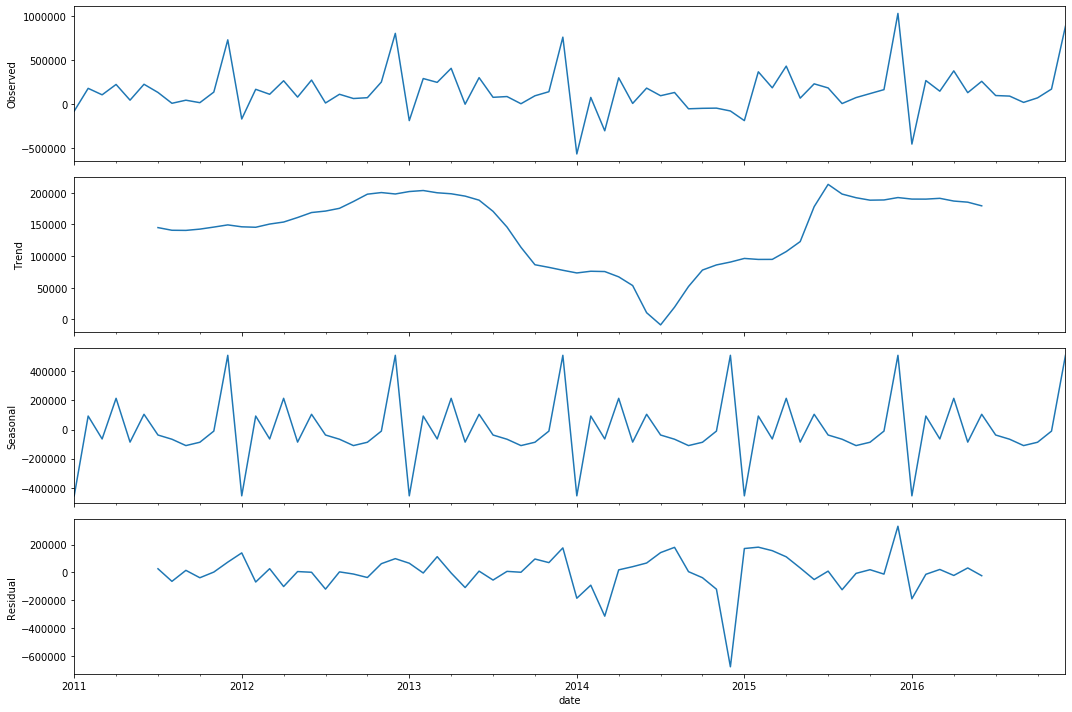

In [47]:
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df2.growth[:72]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df2.growth[:72])[1])

используем сезонное дифференцирование и обычное но позже

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

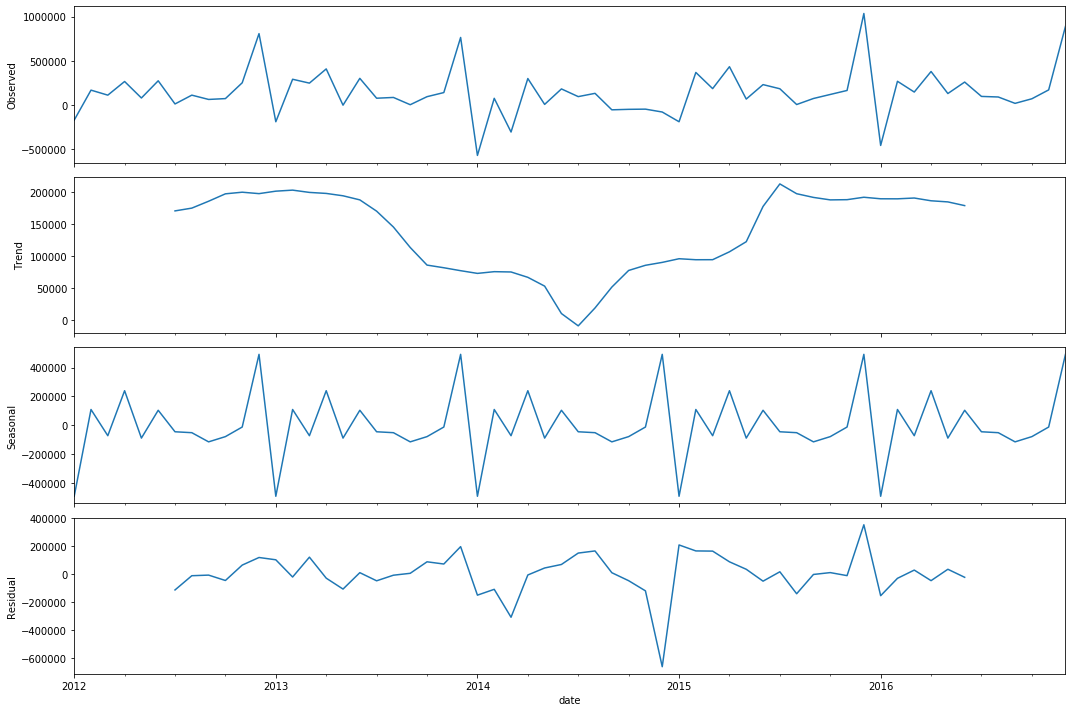

In [48]:
df2['dif_ses'] = df2.growth - df2.growth.shift(12)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df2.growth[12:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df2.growth[12:])[1])

Теперь наш ряд стал стационарным поэтому перейдем с подбору параметров с помощью ACF/PACF

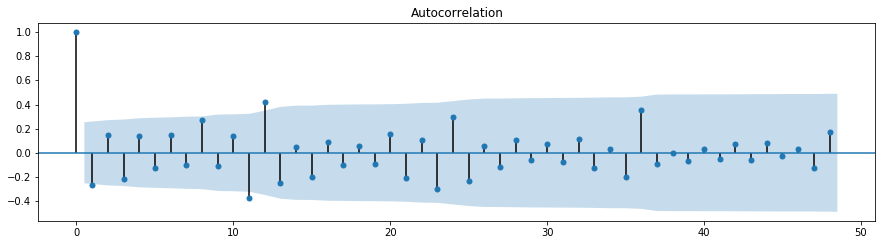

C:\Users\Ivan\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


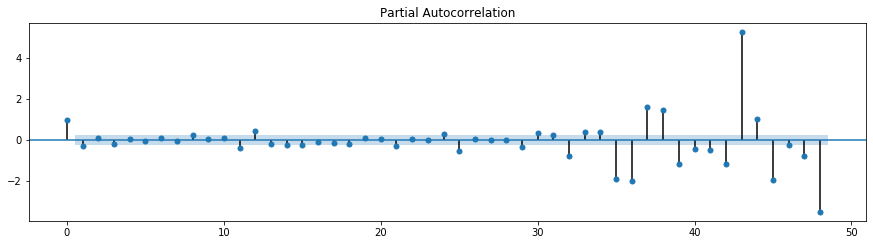

In [49]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df2.growth[12:].values.squeeze(), lags=48, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df2.growth[12:].values.squeeze(), lags=48, ax=ax)
pylab.show()

для подбора параметров начнем с того, что попробуем использовать сезонную автокорреляцию равную 1 и просто автокорреляцию 1 также сезонную частичную корреляцию и просто частичную корреляцию порядка 1 и проверим с помощью индеска AIC

In [50]:
ps = range(0, 2)
d=0
qs = range(0, 2)
Ps = range(0, 2)
D=1
Qs = range(0, 2)

In [51]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

16

In [52]:
%%time
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(df2.growth, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

Wall time: 1.33 s


In [53]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters          aic
1   (0, 0, 0, 1)  1634.141292
3   (0, 0, 1, 1)  1635.442862
9   (1, 0, 0, 1)  1641.479252
5   (0, 1, 0, 1)  1642.825730
11  (1, 0, 1, 1)  1642.842112


In [54]:
print(best_model.summary())

                            Statespace Model Results                            
Dep. Variable:                   growth   No. Observations:                   72
Model:             SARIMAX(0, 1, 1, 12)   Log Likelihood                -815.071
Date:                  Tue, 08 Dec 2020   AIC                           1634.141
Time:                          03:04:11   BIC                           1638.330
Sample:                      01-01-2011   HQIC                          1635.780
                           - 12-01-2016                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7381      0.105     -7.032      0.000      -0.944      -0.532
sigma2      3.985e+10   1.82e-12   2.19e+22      0.000    3.99e+10    3.99e+10
Ljung-Box (Q):                      

Критерий Стьюдента: p=0.129487
Критерий Дики-Фуллера: p=0.000000


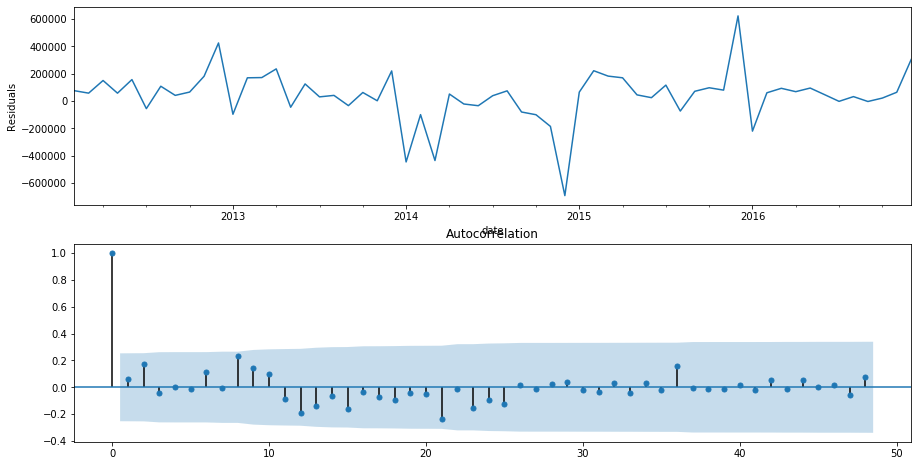

In [55]:
plt.figure(figsize(15,8))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[12:].values.squeeze(), lags=48, ax=ax)

print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[12:], 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[12:])[1])

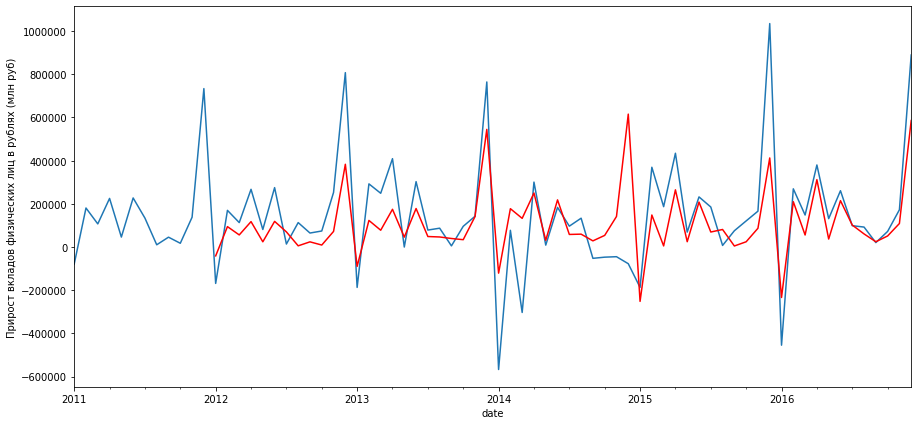

In [56]:
df2['model'] = best_model.fittedvalues
plt.figure(figsize(15,7))
df2.growth[:].plot()
df2.model[12:].plot(color='r')
plt.ylabel('Прирост вкладов физических лиц в рублях (млн руб)')
pylab.show()


Как мне кажется значительно лучше чем с использованием обычной линейной регрессией дальше сделаем прогноз 

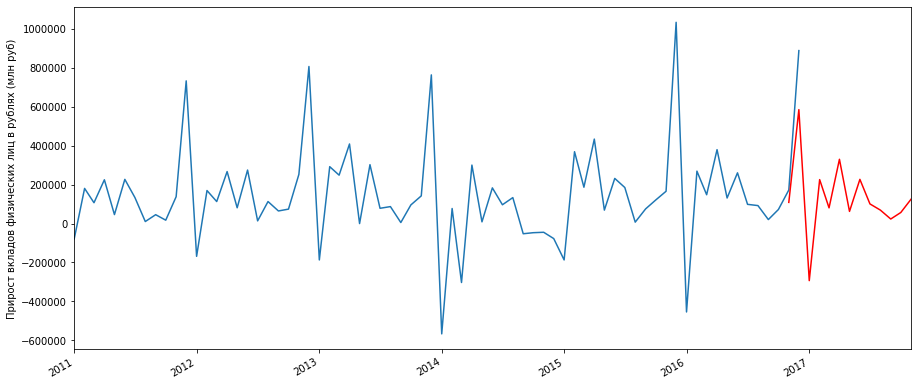

In [57]:
df3 = df2[['growth']]
date_list = [datetime.datetime.strptime("2016-12-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= df2.columns)
df3 = pd.concat([df2, future])
df3['forecast'] = best_model.predict(start=70, end=84)

plt.figure(figsize(15,7))
df3.growth.plot()
df3.forecast.plot(color='r')
plt.ylabel('Прирост вкладов физических лиц в рублях (млн руб)')
pylab.show()

Ниже приведены лучшие результаты в основном была просто применена техника временных рядов, но как видно из графика в конце 2014 года произошло что-то необычное, а точнее кризис и с этим временные ряды достаточно плохо справляются.

In [58]:
best_model.predict(start=70, end=84)

2016-11-01    108682.559457
2016-12-01    585539.002393
2017-01-01   -293746.840517
2017-02-01    225763.741059
2017-03-01     80513.257589
2017-04-01    330226.056110
2017-05-01     62294.187764
2017-06-01    227026.588342
2017-07-01    100715.598474
2017-08-01     69029.069524
2017-09-01     23155.564961
2017-10-01     56684.499782
2017-11-01    125918.389480
2017-12-01    667748.791864
2018-01-01   -293746.840517
Freq: MS, dtype: float64